In [1]:
import scanpy as sc
import pandas as pd
from pathlib import Path
import anndata as ad
import numpy as np
import os

%config InlineBackend.figure_format = 'retina'
%matplotlib inline

import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

DPI = 300
FONTSIZE = 20  # 42

sc.settings.set_figure_params(
    scanpy=True, dpi=100, transparent=True, vector_friendly=True, dpi_save=DPI
)
from matplotlib import rcParams

rcParams["pdf.fonttype"] = 42

In [2]:
DIR2SAVE = Path(
    "/data/BCI-CRC/nasrine/data/CRC/Metastatic_CRC_LM_dataset/final_object/"
)

In [3]:
FIG2SAVE = DIR2SAVE.joinpath("figures/")
FIG2SAVE.mkdir(parents=True, exist_ok=True)
# set the global variable: sc.settings.figdir to save all plots
sc.settings.figdir = FIG2SAVE

### Load annotations global, raw data, subpopulation annotations

In [4]:
# load global annotation object
adata = sc.read_h5ad(
    "/data/BCI-CRC/nasrine/data/CRC/Metastatic_CRC_LM_dataset/annotation_global/Multiome_Che_Wu_CRC_LM_integrated_scvi_hvg_clustering.h5ad"
)
adata.shape

(107428, 2000)

In [5]:
# load raw counts: we also needs this for later on with spatial
adata_raw = sc.read_h5ad(
    "/data/BCI-CRC/nasrine/data/CRC/Metastatic_CRC_LM_dataset/data_integration/Multiome_Che_Wu_CRC_LM_raw.h5ad"
)

In [6]:
# load subpopulation final object (after removal of troublesome clusters)
subpopulations = [
    (
        "Myeloid",
        "/data/BCI-CRC/nasrine/data/CRC/Metastatic_CRC_LM_dataset/subpopulations/Myeloid/final/CRC_LM_decon_scvi_hvg_Myeloid_DC_clustering_final.h5ad",
    ),
    (
        "Stromal",
        "/data/BCI-CRC/nasrine/data/CRC/Metastatic_CRC_LM_dataset/subpopulations/Stromal/final/CRC_LM_decon_scvi_hvg_Stromal_clustering_final.h5ad",
    ),
    (
        "Endothelial",
        "/data/BCI-CRC/nasrine/data/CRC/Metastatic_CRC_LM_dataset/subpopulations/Endothelial/Multiome_Che_Wu_CRC_LM_integrated_scvi_hvg_Endothelial_clustering.h5ad",
    ),
    (
        "TNKILC",
        "/data/BCI-CRC/nasrine/data/CRC/Metastatic_CRC_LM_dataset/subpopulations/TNKILC/final/CRC_LM_decon_scvi_hvg_TNKILC_NK_clustering_final.h5ad",
    ),
    (
        "Hepatocyte",
        "/data/BCI-CRC/nasrine/data/CRC/Metastatic_CRC_LM_dataset/subpopulations/Hepatocyte/final/Multiome_Che_Wu_CRC_LM_integrated_scvi_hvg_Hepatocyte_final.h5ad",
    ),
]

In [7]:
adata_subpop_list = list()

for subpop in subpopulations:
    print(f"Loading {subpop[0]} data")
    adata_subpop_list.append(sc.read_h5ad(subpop[1]))

Loading Myeloid data
Loading Stromal data
Loading Endothelial data
Loading TNKILC data
Loading Hepatocyte data


In [8]:
adata_subpop_list[0].shape

(17232, 2000)

In [9]:
adata_subpop_list[1].shape

(786, 2000)

In [10]:
adata_subpop_list[2].shape

(557, 2000)

In [11]:
adata_subpop_list[3].shape

(75489, 2000)

In [12]:
adata_subpop_list[4].shape

(437, 2000)

#### concatenate annotations from each adata subpopulation in the list adata_subpop_list

In [13]:
# concatenate annotations from each adata subpopulation in the list adata_subpop_list
annotations = pd.concat(
    [
        adata_subpop.obs["Annotation_scVI_detailed"]
        for adata_subpop in adata_subpop_list
    ],
    axis=0,
)
annotations.shape

(94501,)

In [14]:
annotations

CRC01_LM#AAACATGCATCAGCAC-1-BCI-Nuclei         SPP1 Mac
CRC01_LM#AACATAGCAGGATAAC-1-BCI-Nuclei         SPP1 Mac
CRC01_LM#CTAAGGTTCCTTGCGT-1-BCI-Nuclei         SPP1 Mac
CRC01_LM#CTTGTAAAGTCAATCA-1-BCI-Nuclei         SPP1 Mac
CRC01_LM#GATCCGTCAAATGCCC-1-BCI-Nuclei         SPP1 Mac
                                              ...      
CRC14_LM#TCATTACTCGCACAAT-1-BCI-Nuclei    Cholangiocyte
CRC14_LM#TCGCGAGGTTGCGGAT-1-BCI-Nuclei       Hepatocyte
CRC14_LM#TCGTTAAAGCTGTACG-1-BCI-Nuclei       Hepatocyte
CRC14_LM#TGAAGCAAGCTGGAAA-1-BCI-Nuclei    Cholangiocyte
CRC14_LM#TGGACTAGTACTGAAT-1-BCI-Nuclei       Hepatocyte
Name: Annotation_scVI_detailed, Length: 94501, dtype: object

#### check number of cells is the same after concatenation 

In [15]:
assert (
    adata_subpop_list[0].shape[0]
    + adata_subpop_list[1].shape[0]
    + adata_subpop_list[2].shape[0]
    + adata_subpop_list[3].shape[0]
    + adata_subpop_list[4].shape[0]
    == annotations.shape[0]
)

In [16]:
annotations

CRC01_LM#AAACATGCATCAGCAC-1-BCI-Nuclei         SPP1 Mac
CRC01_LM#AACATAGCAGGATAAC-1-BCI-Nuclei         SPP1 Mac
CRC01_LM#CTAAGGTTCCTTGCGT-1-BCI-Nuclei         SPP1 Mac
CRC01_LM#CTTGTAAAGTCAATCA-1-BCI-Nuclei         SPP1 Mac
CRC01_LM#GATCCGTCAAATGCCC-1-BCI-Nuclei         SPP1 Mac
                                              ...      
CRC14_LM#TCATTACTCGCACAAT-1-BCI-Nuclei    Cholangiocyte
CRC14_LM#TCGCGAGGTTGCGGAT-1-BCI-Nuclei       Hepatocyte
CRC14_LM#TCGTTAAAGCTGTACG-1-BCI-Nuclei       Hepatocyte
CRC14_LM#TGAAGCAAGCTGGAAA-1-BCI-Nuclei    Cholangiocyte
CRC14_LM#TGGACTAGTACTGAAT-1-BCI-Nuclei       Hepatocyte
Name: Annotation_scVI_detailed, Length: 94501, dtype: object

In [17]:
annotations.unique()

array(['SPP1 Mac', 'IL1B Mac', 'Myeloid cycling', 'C1QC Mac',
       'PLTP LYVE1 Mac', 'FCN1 Mono', 'HSP Mono', 'cDC2', 'NLRP3 Mac',
       'pDC', 'Neutrophil', 'Kupffer', 'migDC', 'cDC1', 'ECM CAF',
       'Pericyte', 'C3 iCAF', 'Myofibroblast', 'SMC', 'Lymphatic endo',
       'Tip-like endo', 'SEC', 'Stalk-like endo', 'Treg', 'CD8 Tem HSP',
       'CD4 Th', 'CD8 Tex', 'CD4 Th17', 'CD8 Tem', 'gdT', 'T cycling',
       'CD4 Tfh', 'MAIT', 'CD8 Tem GZMB', 'CD4 Tn', 'NKT', 'NK2', 'NK1',
       'CD4 Th HSP', 'Hepatocyte', 'Cholangiocyte'], dtype=object)

### Add annotations from subpopulations analysis to main andata object

In [18]:
adata.obs = adata.obs.merge(
    right=annotations, how="left", left_index=True, right_index=True
)

In [19]:
adata.obs

Patient       Sample    Cell_type  \
CRC01_LM#AAACATGCATCAGCAC-1-BCI-Nuclei        CRC01     CRC01_LM      Myeloid   
CRC01_LM#AACATAGCAGGATAAC-1-BCI-Nuclei        CRC01     CRC01_LM      Myeloid   
CRC01_LM#AACTCACAGAATGACG-1-BCI-Nuclei        CRC01     CRC01_LM      Myeloid   
CRC01_LM#AGAACAAGTGGTTATG-1-BCI-Nuclei        CRC01     CRC01_LM  Endothelial   
CRC01_LM#AGGTTGCGTGAGCAAG-1-BCI-Nuclei        CRC01     CRC01_LM  Endothelial   
...                                             ...          ...          ...   
P8_Liver_T_GAGAAATAGGCCTGAA-Wu-Cells      Wu2021_P8   P8_Liver_T       Plasma   
P15_Liver_T_TTATTGCTCGCTAATG-1-Wu-Cells  Wu2021_P15  P15_Liver_T       Plasma   
P17_Liver_T_AAATGGACATGGAAGC-1-Wu-Cells  Wu2021_P17  P17_Liver_T       Plasma   
P18_Liver_T_TAACCAGCACTGCGAC-1-Wu-Cells  Wu2021_P18  P18_Liver_T       Plasma   
P19_Liver_T_ATTTACCAGCGACTGA-1-Wu-Cells  Wu2021_P19  P19_Liver_T       Plasma   

                                                 Cell_subtype Tissue Therapy  \
CRC01_LM#AAACATGCATCAGCAC-1-BCI-Nuclei          No annotation     LM     NAC   
CRC01_LM#AACATAGCAGGATAAC-1-BCI-Nuclei          No annotation     LM     NAC   
CRC01_LM#AACTCACAGAATGACG-1-BCI-Nuclei          No annotation     LM     NAC   
CRC01_LM#AGAACAAGTGGTTATG-1-BCI-Nuclei          No annotation     LM     NAC   
CRC01_LM#AGGTTGCGTGAGCAAG-1-BCI-Nuclei          No annotation     LM     NAC   
...                                                       ...    ...     ...   
P8_Liver_T_GAGAAATAGGCCTGAA-Wu-Cells     IGHG+ Plasma B cells     LM   naive   
P15_Liver_T_TTATTGCTCGCTAATG-1-Wu-Cells  IGHA+ Plasma B cells     LM     NAC   
P17_Liver_T_AAATGGACATGGAAGC-1-Wu-Cells  IGHG+ Plasma B cells     LM   naive   
P18_Liver_T_TAACCAGCACTGCGAC-1-Wu-Cells  IGHA+ Plasma B cells     LM     NAC   
P19_Liver_T_ATTTACCAGCGACTGA-1-Wu-Cells  IGHA+ Plasma B cells     LM     NAC   

                                         doublet_score  n_genes_by_counts  \
CRC01_LM#AAACATGCATCAGCAC-1-BCI-Nuclei        0.001115                727   
CRC01_LM#AACATAGCAGGATAAC-1-BCI-Nuclei        0.002359                365   
CRC01_LM#AACTCACAGAATGACG-1-BCI-Nuclei        0.011868               1363   
CRC01_LM#AGAACAAGTGGTTATG-1-BCI-Nuclei        0.000901                983   
CRC01_LM#AGGTTGCGTGAGCAAG-1-BCI-Nuclei        0.000203               5086   
...                                                ...                ...   
P8_Liver_T_GAGAAATAGGCCTGAA-Wu-Cells          0.133690               2624   
P15_Liver_T_TTATTGCTCGCTAATG-1-Wu-Cells       0.132075                903   
P17_Liver_T_AAATGGACATGGAAGC-1-Wu-Cells       0.148265               1680   
P18_Liver_T_TAACCAGCACTGCGAC-1-Wu-Cells       0.203540                776   
P19_Liver_T_ATTTACCAGCGACTGA-1-Wu-Cells       0.092437               1364   

                                         total_counts  pct_counts_mt  ...  \
CRC01_LM#AAACATGCATCAGCAC-1-BCI-Nuclei          981.0       3.771662  ...   
CRC01_LM#AACATAGCAGGATAAC-1-BCI-Nuclei          461.0       1.301518  ...   
CRC01_LM#AACTCACAGAATGACG-1-BCI-Nuclei         1710.0       2.456140  ...   
CRC01_LM#AGAACAAGTGGTTATG-1-BCI-Nuclei         1220.0       2.377049  ...   
CRC01_LM#AGGTTGCGTGAGCAAG-1-BCI-Nuclei        10885.0       2.351860  ...   
...                                               ...            ...  ...   
P8_Liver_T_GAGAAATAGGCCTGAA-Wu-Cells          17023.0       2.202902  ...   
P15_Liver_T_TTATTGCTCGCTAATG-1-Wu-Cells        3453.0       2.114104  ...   
P17_Liver_T_AAATGGACATGGAAGC-1-Wu-Cells        7002.0       3.313339  ...   
P18_Liver_T_TAACCAGCACTGCGAC-1-Wu-Cells        2594.0       9.483423  ...   
P19_Liver_T_ATTTACCAGCGACTGA-1-Wu-Cells        4740.0       3.206751  ...   

                                         cell_source _scvi_batch  \
CRC01_LM#AAACATGCATCAGCAC-1-BCI-Nuclei    BCI-Nuclei           0   
CRC01_LM#AACATAGCAGGATAAC-1-BCI-Nuclei    BCI-Nuclei           0   
CRC01_LM#AACTCACAGAATGACG-1-BCI-Nuclei    BCI-Nuclei    

### remove hepatocytes that have been removed in the analysis

In [20]:
adata[
    (adata.obs["Annotation_scVI"] == "Hepatocyte")
    & adata.obs.Annotation_scVI_detailed.isna()
].obs.shape

(30, 21)

In [21]:
hepa2remove = adata[
    (adata.obs["Annotation_scVI"] == "Hepatocyte")
    & adata.obs.Annotation_scVI_detailed.isna()
].obs.index

In [22]:
adata = adata[~adata.obs.index.isin(hepa2remove)].copy()

In [23]:
adata.shape

(107398, 2000)

### Replace value of nan in Annotation_scVI_detailed with value from global annotation

In [24]:
adata.obs.Annotation_scVI_detailed = np.where(
    adata.obs.Annotation_scVI_detailed.isna(),  # where NaN values in detailed annot
    adata.obs.Annotation_scVI,  # put general annotations
    adata.obs.Annotation_scVI_detailed,
)  # keep detailed annotations

adata.obs.Annotation_scVI_detailed = adata.obs.Annotation_scVI_detailed.astype(
    "category"
)

In [25]:
adata.obs.Annotation_scVI_detailed.value_counts()

CD4 Th             10325
CD8 Tem             8683
Treg                7655
CD8 Tex             7531
CD4 Th HSP          7246
T-NK-ILC            6695
CD8 Tem HSP         6178
CD4 Tn              4778
SPP1 Mac            4619
MAIT                4463
CD8 Tem GZMB        3269
NK1                 3178
CD4 Tfh             3010
Neutrophil          2892
NK2                 2321
Myeloid             2166
B                   2116
NLRP3 Mac           2075
C1QC Mac            2006
CD4 Th17            1937
T cycling           1774
gdT                 1761
Plasma              1610
cDC2                1543
NKT                 1380
FCN1 Mono            999
Kupffer              600
PLTP LYVE1 Mac       574
IL1B Mac             550
Myeloid cycling      513
ECM CAF              441
HSP Mono             387
Hepatocyte           338
Tip-like endo        273
pDC                  239
Stromal              223
cDC1                 163
SMC                  143
SEC                  120
Myofibroblast        101


### remove cells we discarded in the analysis because of doublets, etc..

In [26]:
adata = adata[
    ~adata.obs.Annotation_scVI_detailed.isin(
        ["Myeloid", "T-NK-ILC", "Stromal", "Endothelial"]
    )
].copy()
# keep epithelial, hepatocyte and B because we need them

In [27]:
adata.obs.Annotation_scVI_detailed.value_counts()

CD4 Th             10325
CD8 Tem             8683
Treg                7655
CD8 Tex             7531
CD4 Th HSP          7246
CD8 Tem HSP         6178
CD4 Tn              4778
SPP1 Mac            4619
MAIT                4463
CD8 Tem GZMB        3269
NK1                 3178
CD4 Tfh             3010
Neutrophil          2892
NK2                 2321
B                   2116
NLRP3 Mac           2075
C1QC Mac            2006
CD4 Th17            1937
T cycling           1774
gdT                 1761
Plasma              1610
cDC2                1543
NKT                 1380
FCN1 Mono            999
Kupffer              600
PLTP LYVE1 Mac       574
IL1B Mac             550
Myeloid cycling      513
ECM CAF              441
HSP Mono             387
Hepatocyte           338
Tip-like endo        273
pDC                  239
cDC1                 163
SMC                  143
SEC                  120
Myofibroblast        101
Cholangiocyte         99
Stalk-like endo       91
Mast                  85


### Need to change colours in met!!!!!!

In [28]:
adata.obs.Annotation_scVI.cat.categories

Index(['B', 'Endothelial', 'Hepatocyte', 'Mast', 'Myeloid', 'Plasma',
       'Stromal', 'T-NK-ILC'],
      dtype='object')

In [30]:
# colour for met
pal_dict = {"B": "#BEBADA",
            "Endothelial": "#8DD3C7",
            "Epithelial": "#FB8072",#E41A1C #FB8072
            "Hepatocyte": "#FDB462",
            "Mast": "#fccde5", #"#000000",
            "Myeloid": "#80B1D3",
            "Plasma": "#7570B3",#B3B3B3
            "Stromal": "#B3DE69",
            "T-NK-ILC": "#F781BF"
           } 

In [32]:
adata.uns["Annotation_scVI_colors"] = [
    pal_dict["B"],
    pal_dict["Endothelial"],
    pal_dict["Hepatocyte"],
    pal_dict["Mast"],
    pal_dict["Myeloid"],
    pal_dict["Plasma"],
    pal_dict["Stromal"],
    pal_dict["T-NK-ILC"]
]

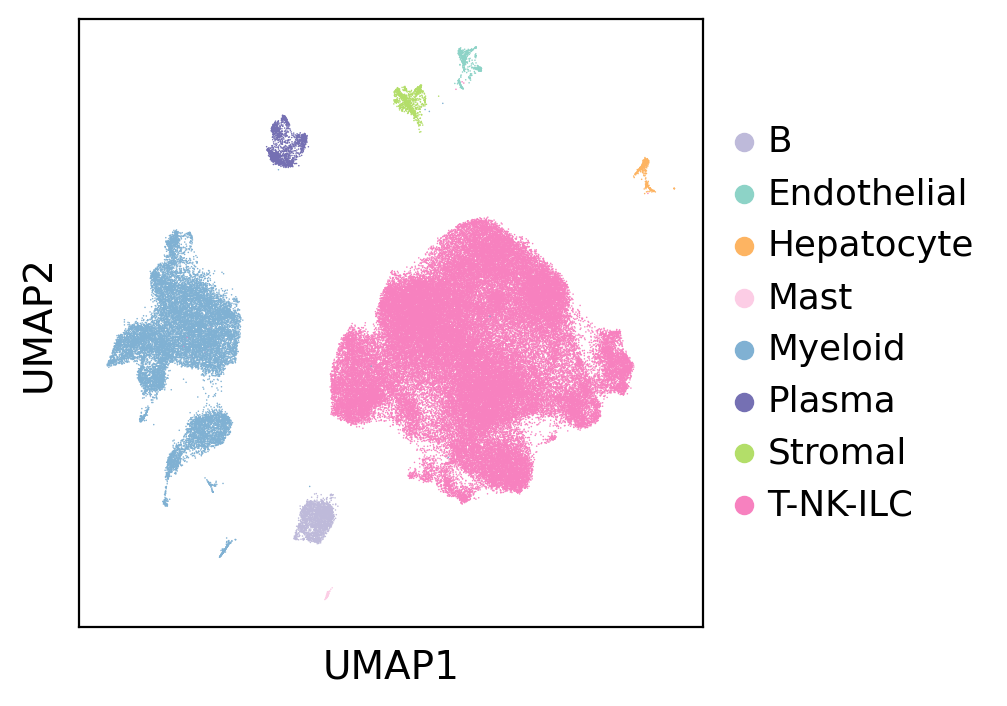

In [33]:
sc.pl.umap(adata, color="Annotation_scVI", save="Annotations_global.pdf", title="")

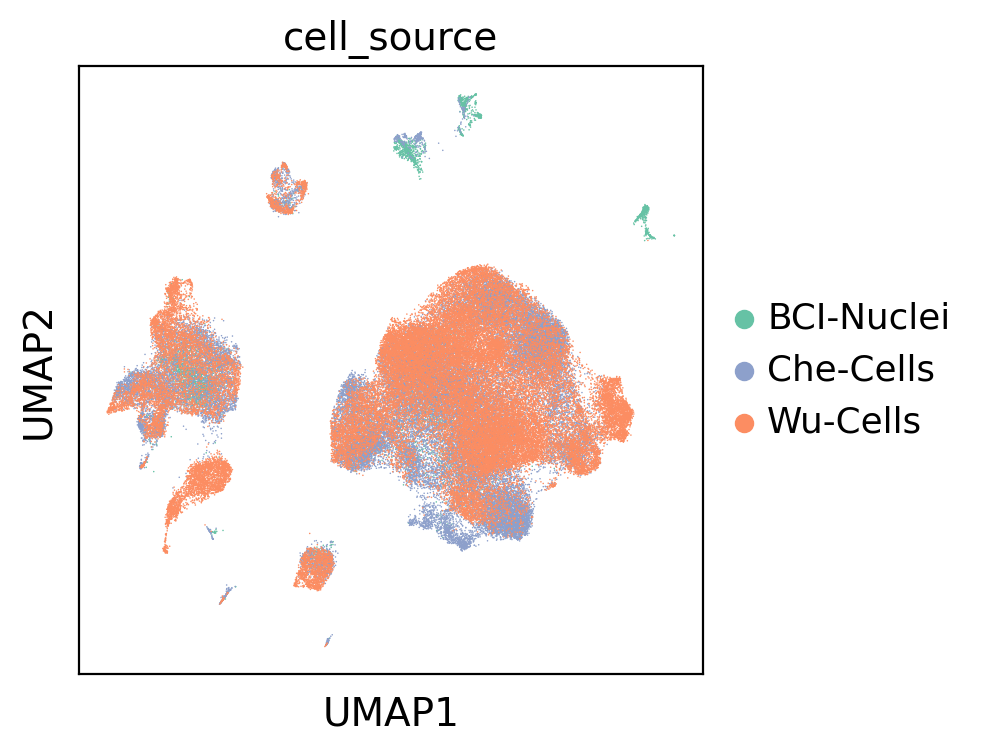

In [34]:
sc.pl.umap(adata, color="cell_source", save="cell_source_global.pdf")

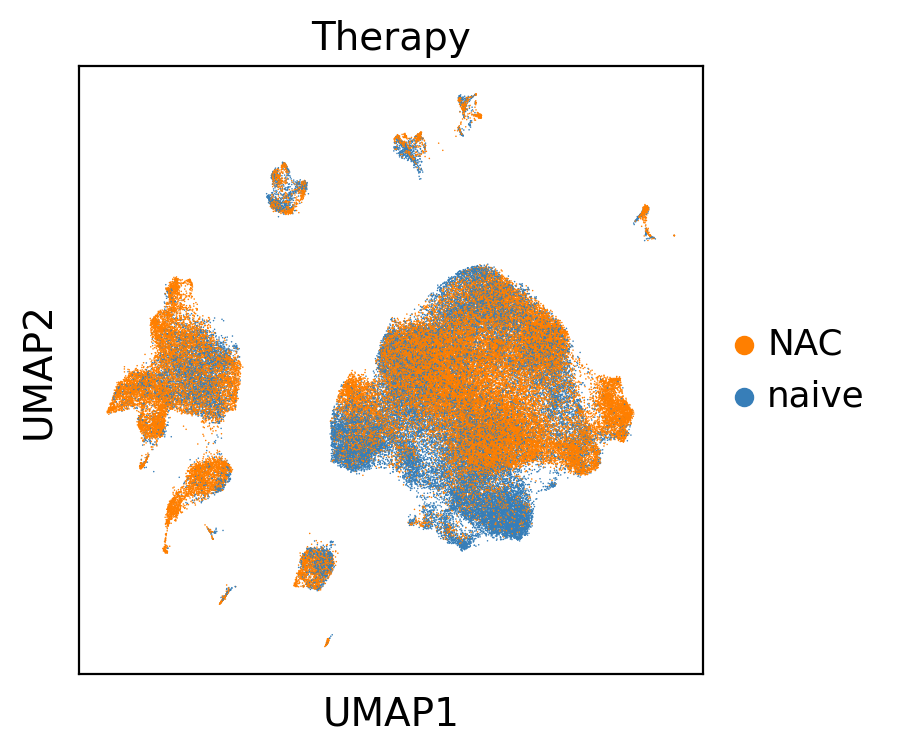

In [35]:
sc.pl.umap(adata, color="Therapy", save="therapy_global.pdf")

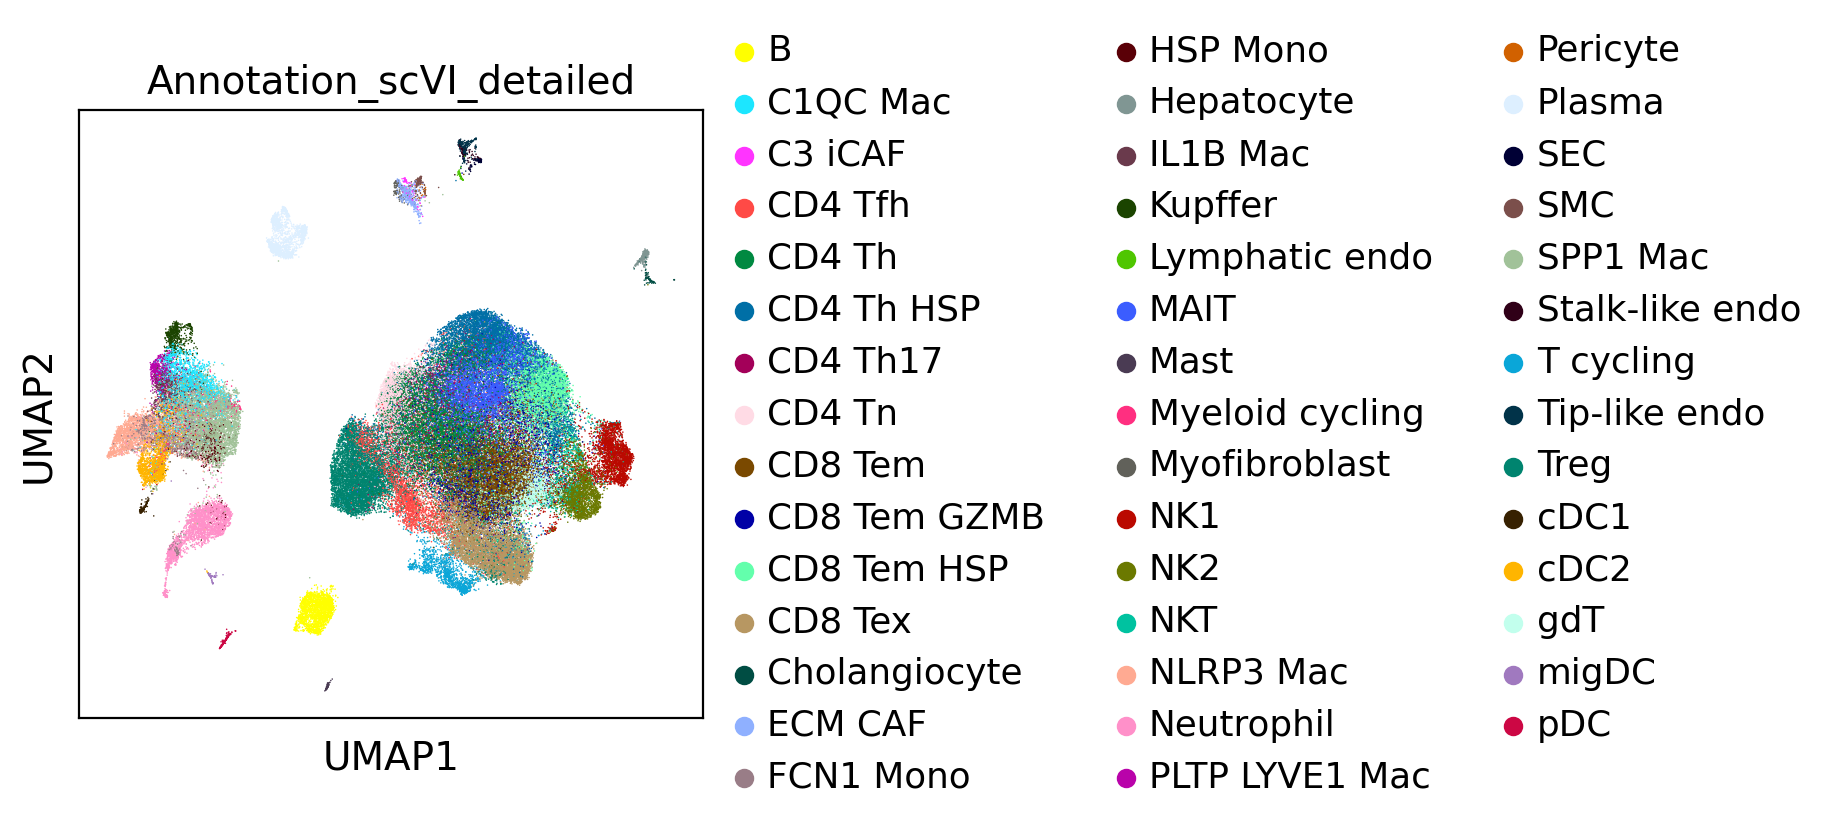

In [36]:
sc.pl.umap(adata, color="Annotation_scVI_detailed")

### plot proportion per cell type

In [5]:
DPI

300

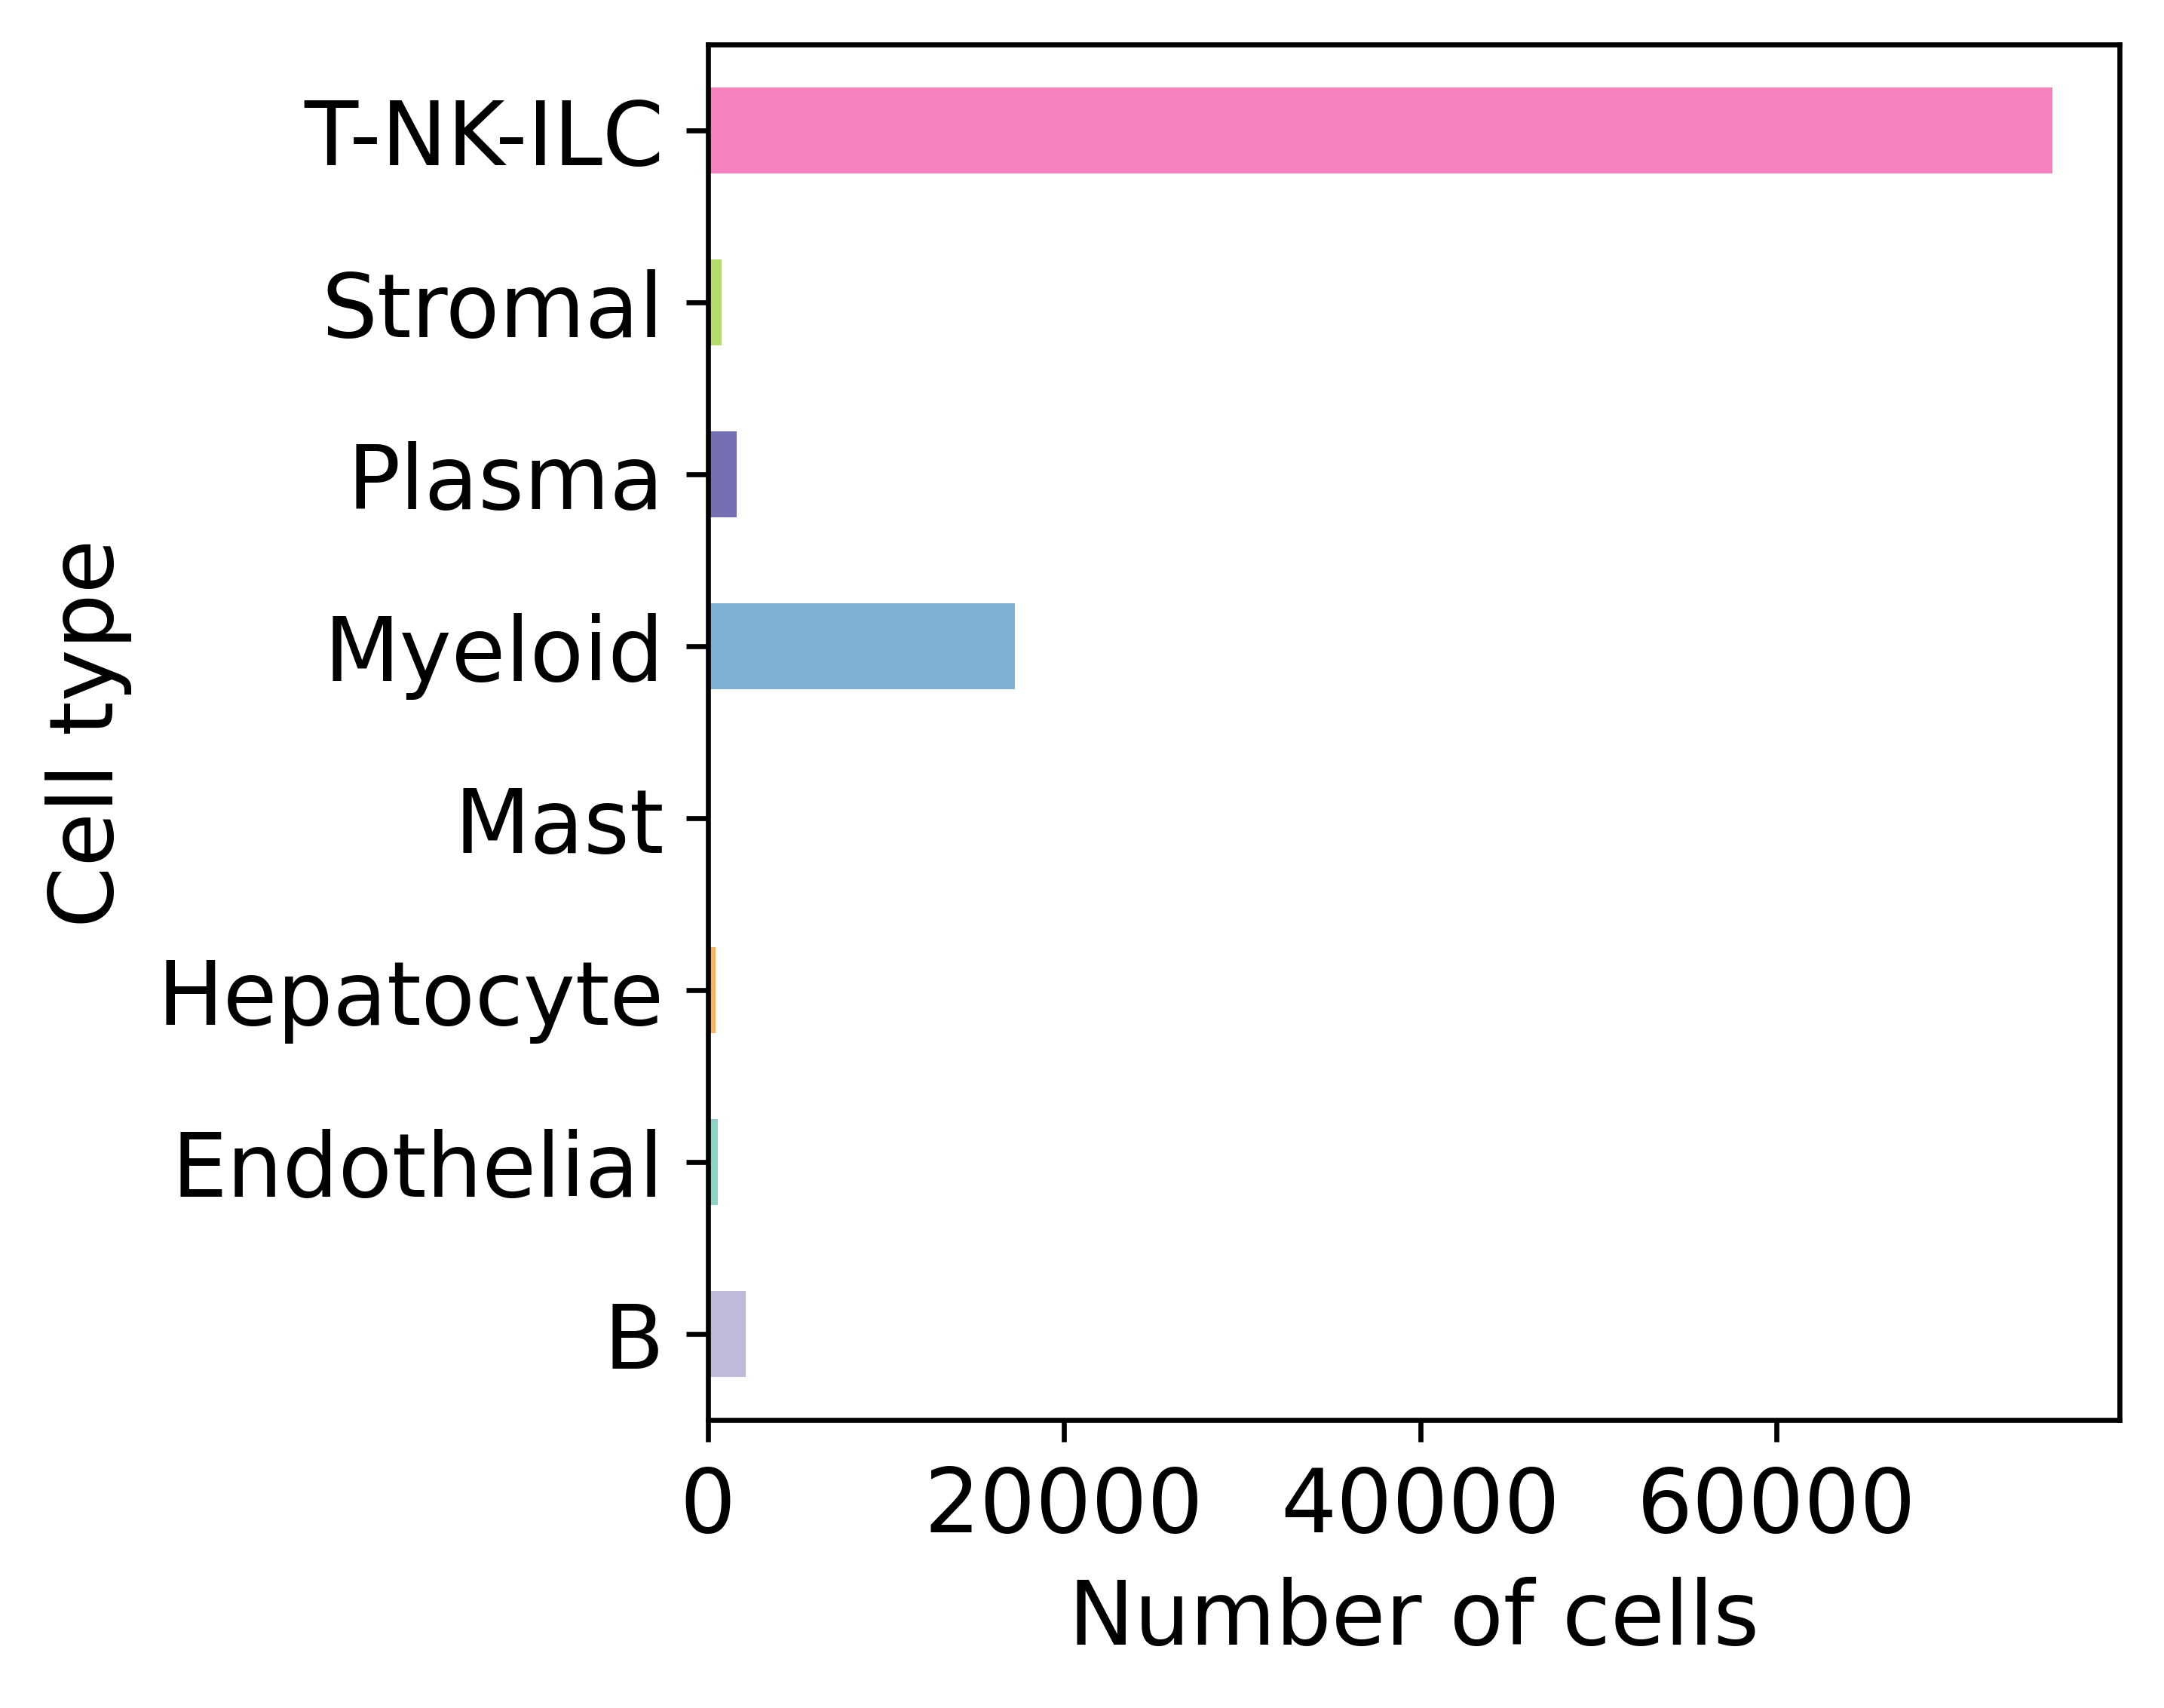

In [6]:
from collections import OrderedDict

color_dict = OrderedDict(
    zip(
        adata.obs["Annotation_scVI"].cat.categories.values.tolist(),
        adata.uns["Annotation_scVI_colors"],
    )
)

fig, ax = plt.subplots(nrows=1, ncols=1, sharey=False, sharex=False, dpi=DPI)
adata.obs.groupby("Annotation_scVI").size().plot.barh(color=color_dict.values(), ax=ax)
ax.set_ylabel("Cell type")
ax.set_xlabel("Number of cells")
ax.grid(False, which="major", axis="both")  # removes major horizontal gridlinesd
plt.savefig(FIG2SAVE.joinpath("barplot_nb_cells_celltype.pdf"), dpi=DPI, format="pdf", bbox_inches="tight")
plt.show()

In [38]:
markers = {
    "Epithelial": ["EPCAM", "CDH1"],
    "Myeloid": ["CD68", "CD14"],
    "Kupffer": ["SLC11A1", "CD5L", "TIMD4", "CETP"],
    "Granulocyte": ["CPA3", "GATA2", "TPSAB1"],
    "Neutrophil": [
        "FCGR3B",
        "S100A8",
        "S100A12",
        "MPO",
        "ELANE",
        "DEFA4",
        "DEFA3",
        "CEACAM6",
    ],
    "Stromal": ["DCN", "VCAM1", "COL1A1", "COL3A1"],
    "Endothelial": ["PECAM1", "CDH5", "LYVE1"],
    "T/NK/ILC": ["TRAC", "CD3D", "CD3E", "CD3G", "KLRB1", "GZMB"],
    "NK": ["EOMES", "CMC1", "GZMK", "XCL1", "NKG7", "PRF1", "NCR1", "NCAM1", "FCER1G"],
    "ILC": ["AREG", "TLE1", "IL4I1"],
    "Mast": ["KIT", "TPSAB1", "TPSB2", "MS4A2"],
    "B": ["CD79A", "MS4A1"],
    "Plasma B": ["SDC1", "MZB1"],
    "Hepatocyte": ["ALB", "TTR", "APOA1", "AFP"],
    "Cholangiocyte": ["SOX9", "EPCAM", "KRT19", "CLDN4", "CLDN10", "FXYD2"],
    "DC": ["FCER1A", "PKIB", "CD1C", "PCLAF", "CLEC10A", "CES1"],
}

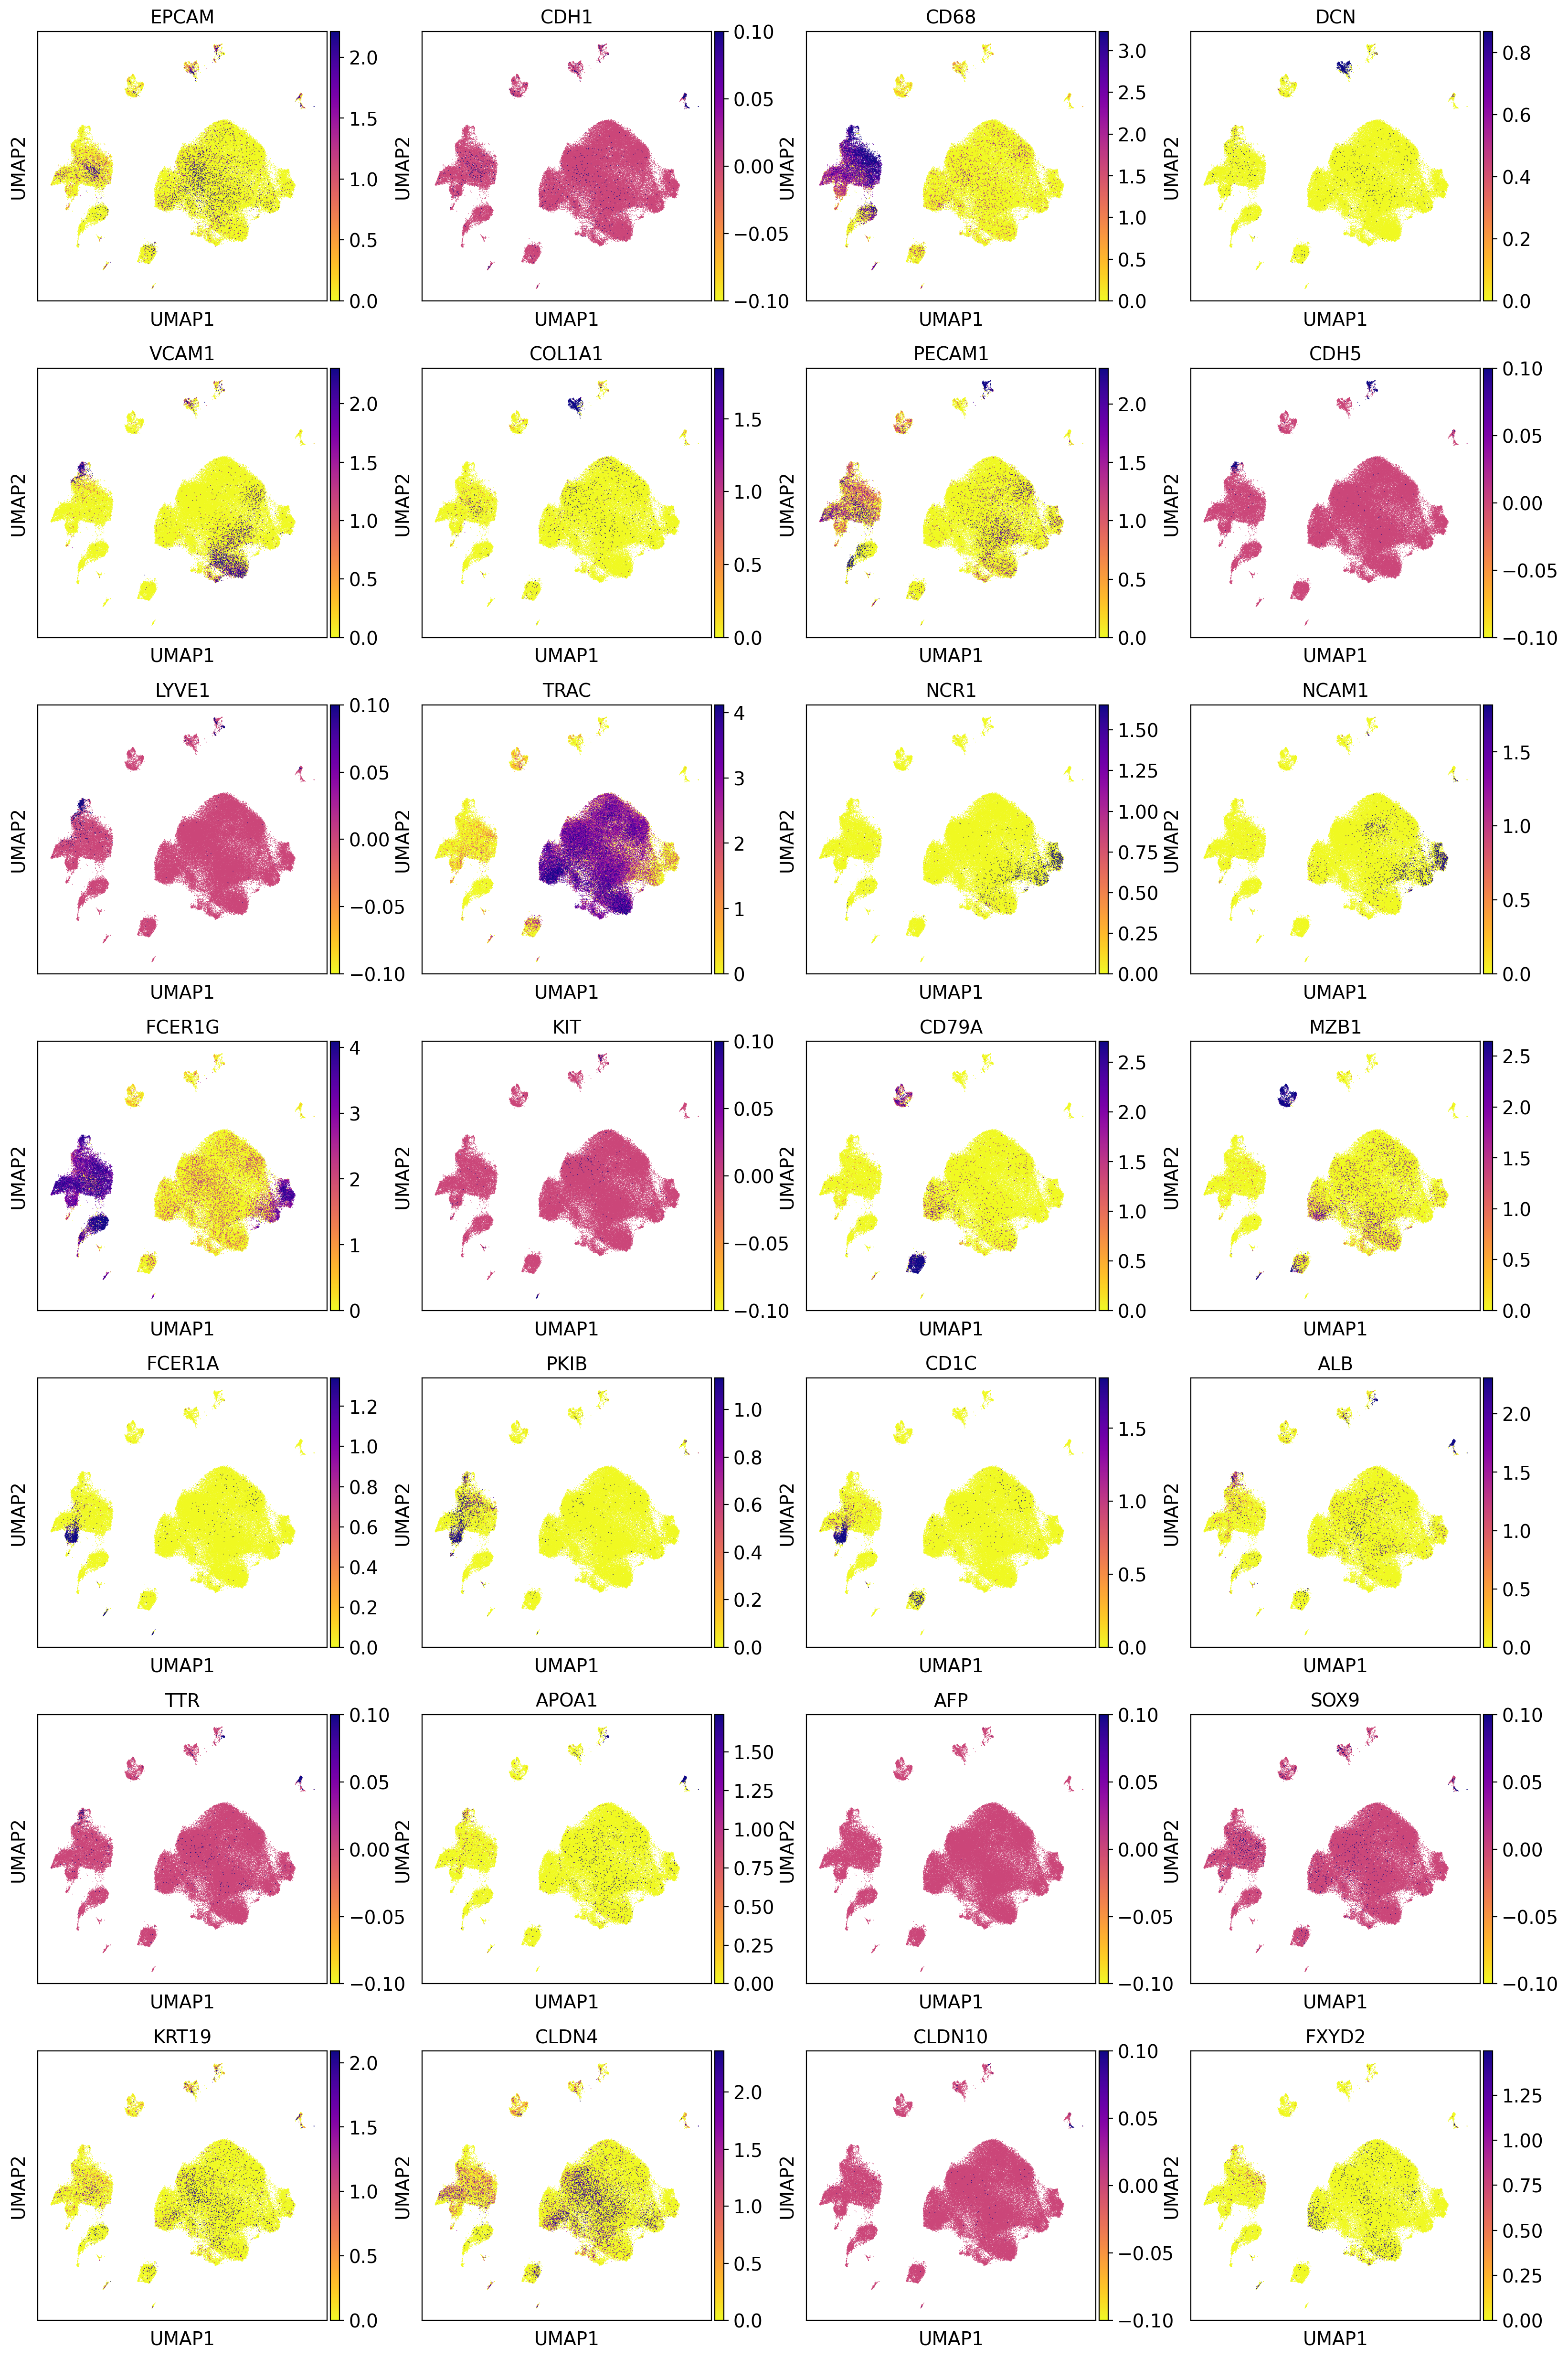

In [39]:
marker_subset = [
    "EPCAM",
    "CDH1",
    "CD68",
    "DCN",
    "VCAM1",
    "COL1A1",
    "PECAM1",
    "CDH5",
    "LYVE1",
    "TRAC",
    "NCR1",
    "NCAM1",
    "FCER1G",
    "KIT",
    "CD79A",
    "MZB1",
    "FCER1A",
    "PKIB",
    "CD1C",
    "ALB",
    "TTR",
    "APOA1",
    "AFP",
    "SOX9",
    "KRT19",
    "CLDN4",
    "CLDN10",
    "FXYD2",
]
sc.pl.umap(
    adata,
    color=marker_subset,
    use_raw=True,
    vmin=0.0,
    vmax="p99",
    color_map="plasma_r",
    save="general_markers_major_celltypes.pdf",
    show=True,
)

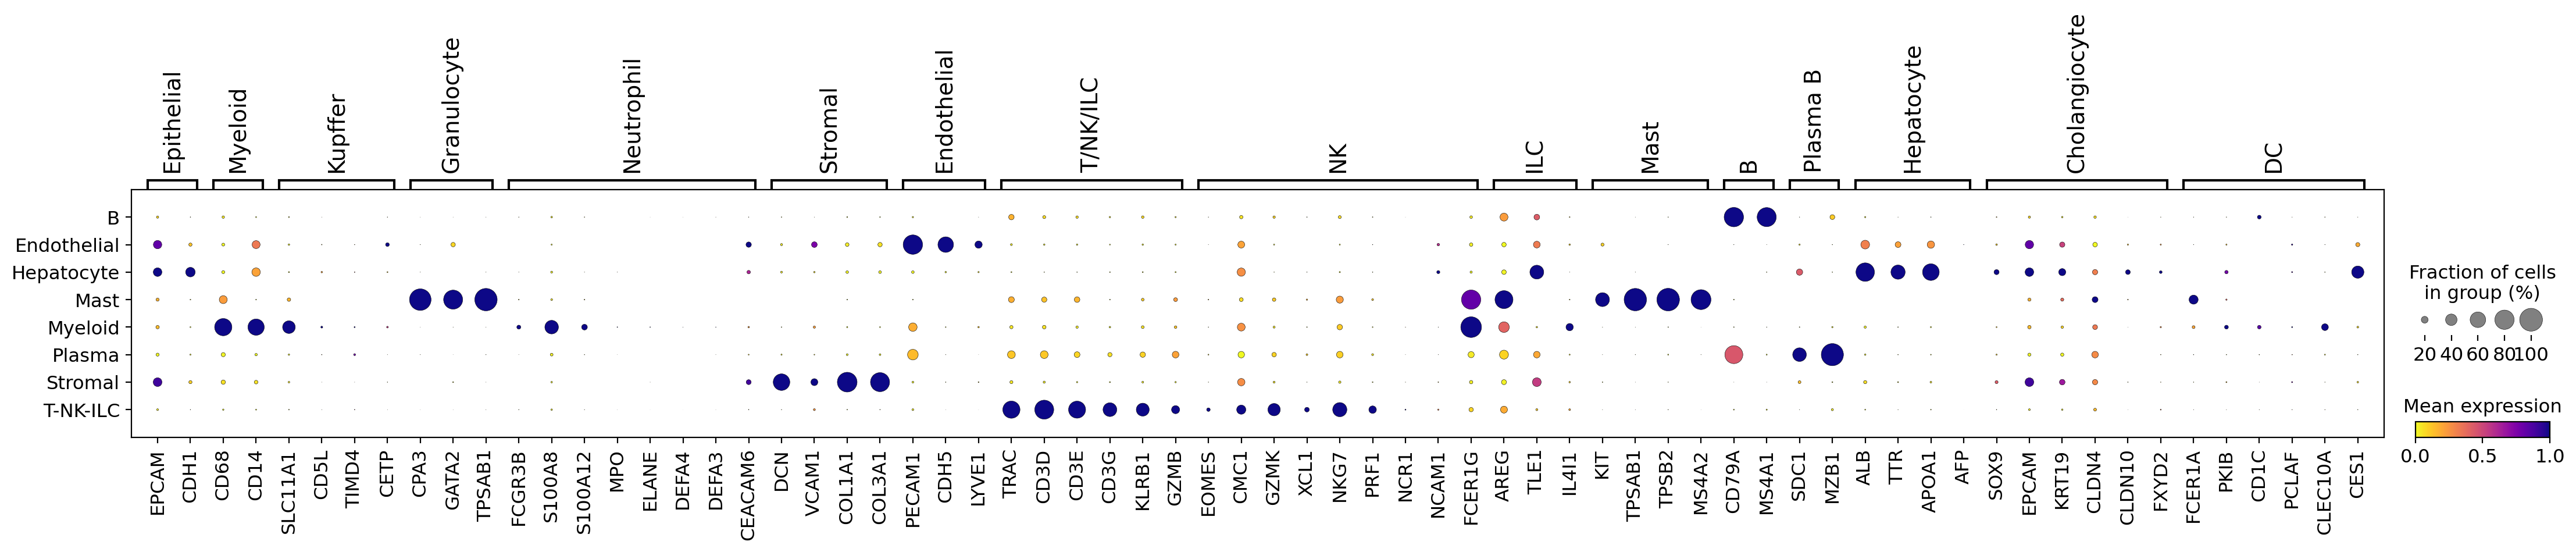

In [40]:
sc.pl.dotplot(
    adata,
    groupby="Annotation_scVI",
    use_raw=True,
    var_names=markers,
    cmap="plasma_r",
    standard_scale="var",
    vmin=0,
    vmax=1,
    colorbar_title="Mean expression",
    dendrogram=False,
    save="dotplot_mean_general.pdf",
    show=True,
)

In [41]:
from matplotlib.patches import Rectangle


def proportion_cells_patient(
    adata, groupby_labels, xlabel: str, ylabel: str, colors: dict, figname: str
):  # colors
    # compute proportion of cells within each group
    table2plot = (
        adata.reset_index()
        .groupby(groupby_labels)
        .size()
        .groupby(level=0)
        .apply(lambda x: x * 100 / x.sum())
        .unstack()
    )

    fig, ax = plt.subplots(
        nrows=1,
        ncols=1,
        sharey=False,
        sharex=False,
        dpi=DPI,
    )  # figsize=(4, 4))

    print(table2plot)
    table2plot.plot.bar(stacked=True, ax=ax, color=colors.values())  # , color=colors
    ax.set_ylabel(ylabel)
    ax.set_xlabel(xlabel)
    ax.grid(False, which="major", axis="both")  # removes major horizontal gridlinesd

    labels = list(colors.keys())
    l = [Rectangle((0, 0), 0, 0, color=color) for color in list(colors.values())]
    ax.legend(
        l,
        labels,
        loc="upper left",
        bbox_to_anchor=(1, 0.8),
        facecolor="white",
        edgecolor="white",
        ncol=1,
        borderaxespad=0.0,
        framealpha=0,
        frameon=False,
    )

    plt.savefig(FIG2SAVE.joinpath(figname), dpi=DPI, format="pdf", bbox_inches="tight")
    plt.show()

cell_source      BCI-Nuclei  Che-Cells   Wu-Cells
Annotation_scVI                                  
B                  4.631380  35.207940  60.160681
Endothelial       87.791741  12.208259   0.000000
Hepatocyte       100.000000   0.000000   0.000000
Mast               1.176471  90.588235   8.235294
Myeloid           10.608171  38.329851  51.061978
Plasma             3.975155  50.372671  45.652174
Stromal           69.847328  30.152672   0.000000
T-NK-ILC           2.066526  46.948562  50.984912


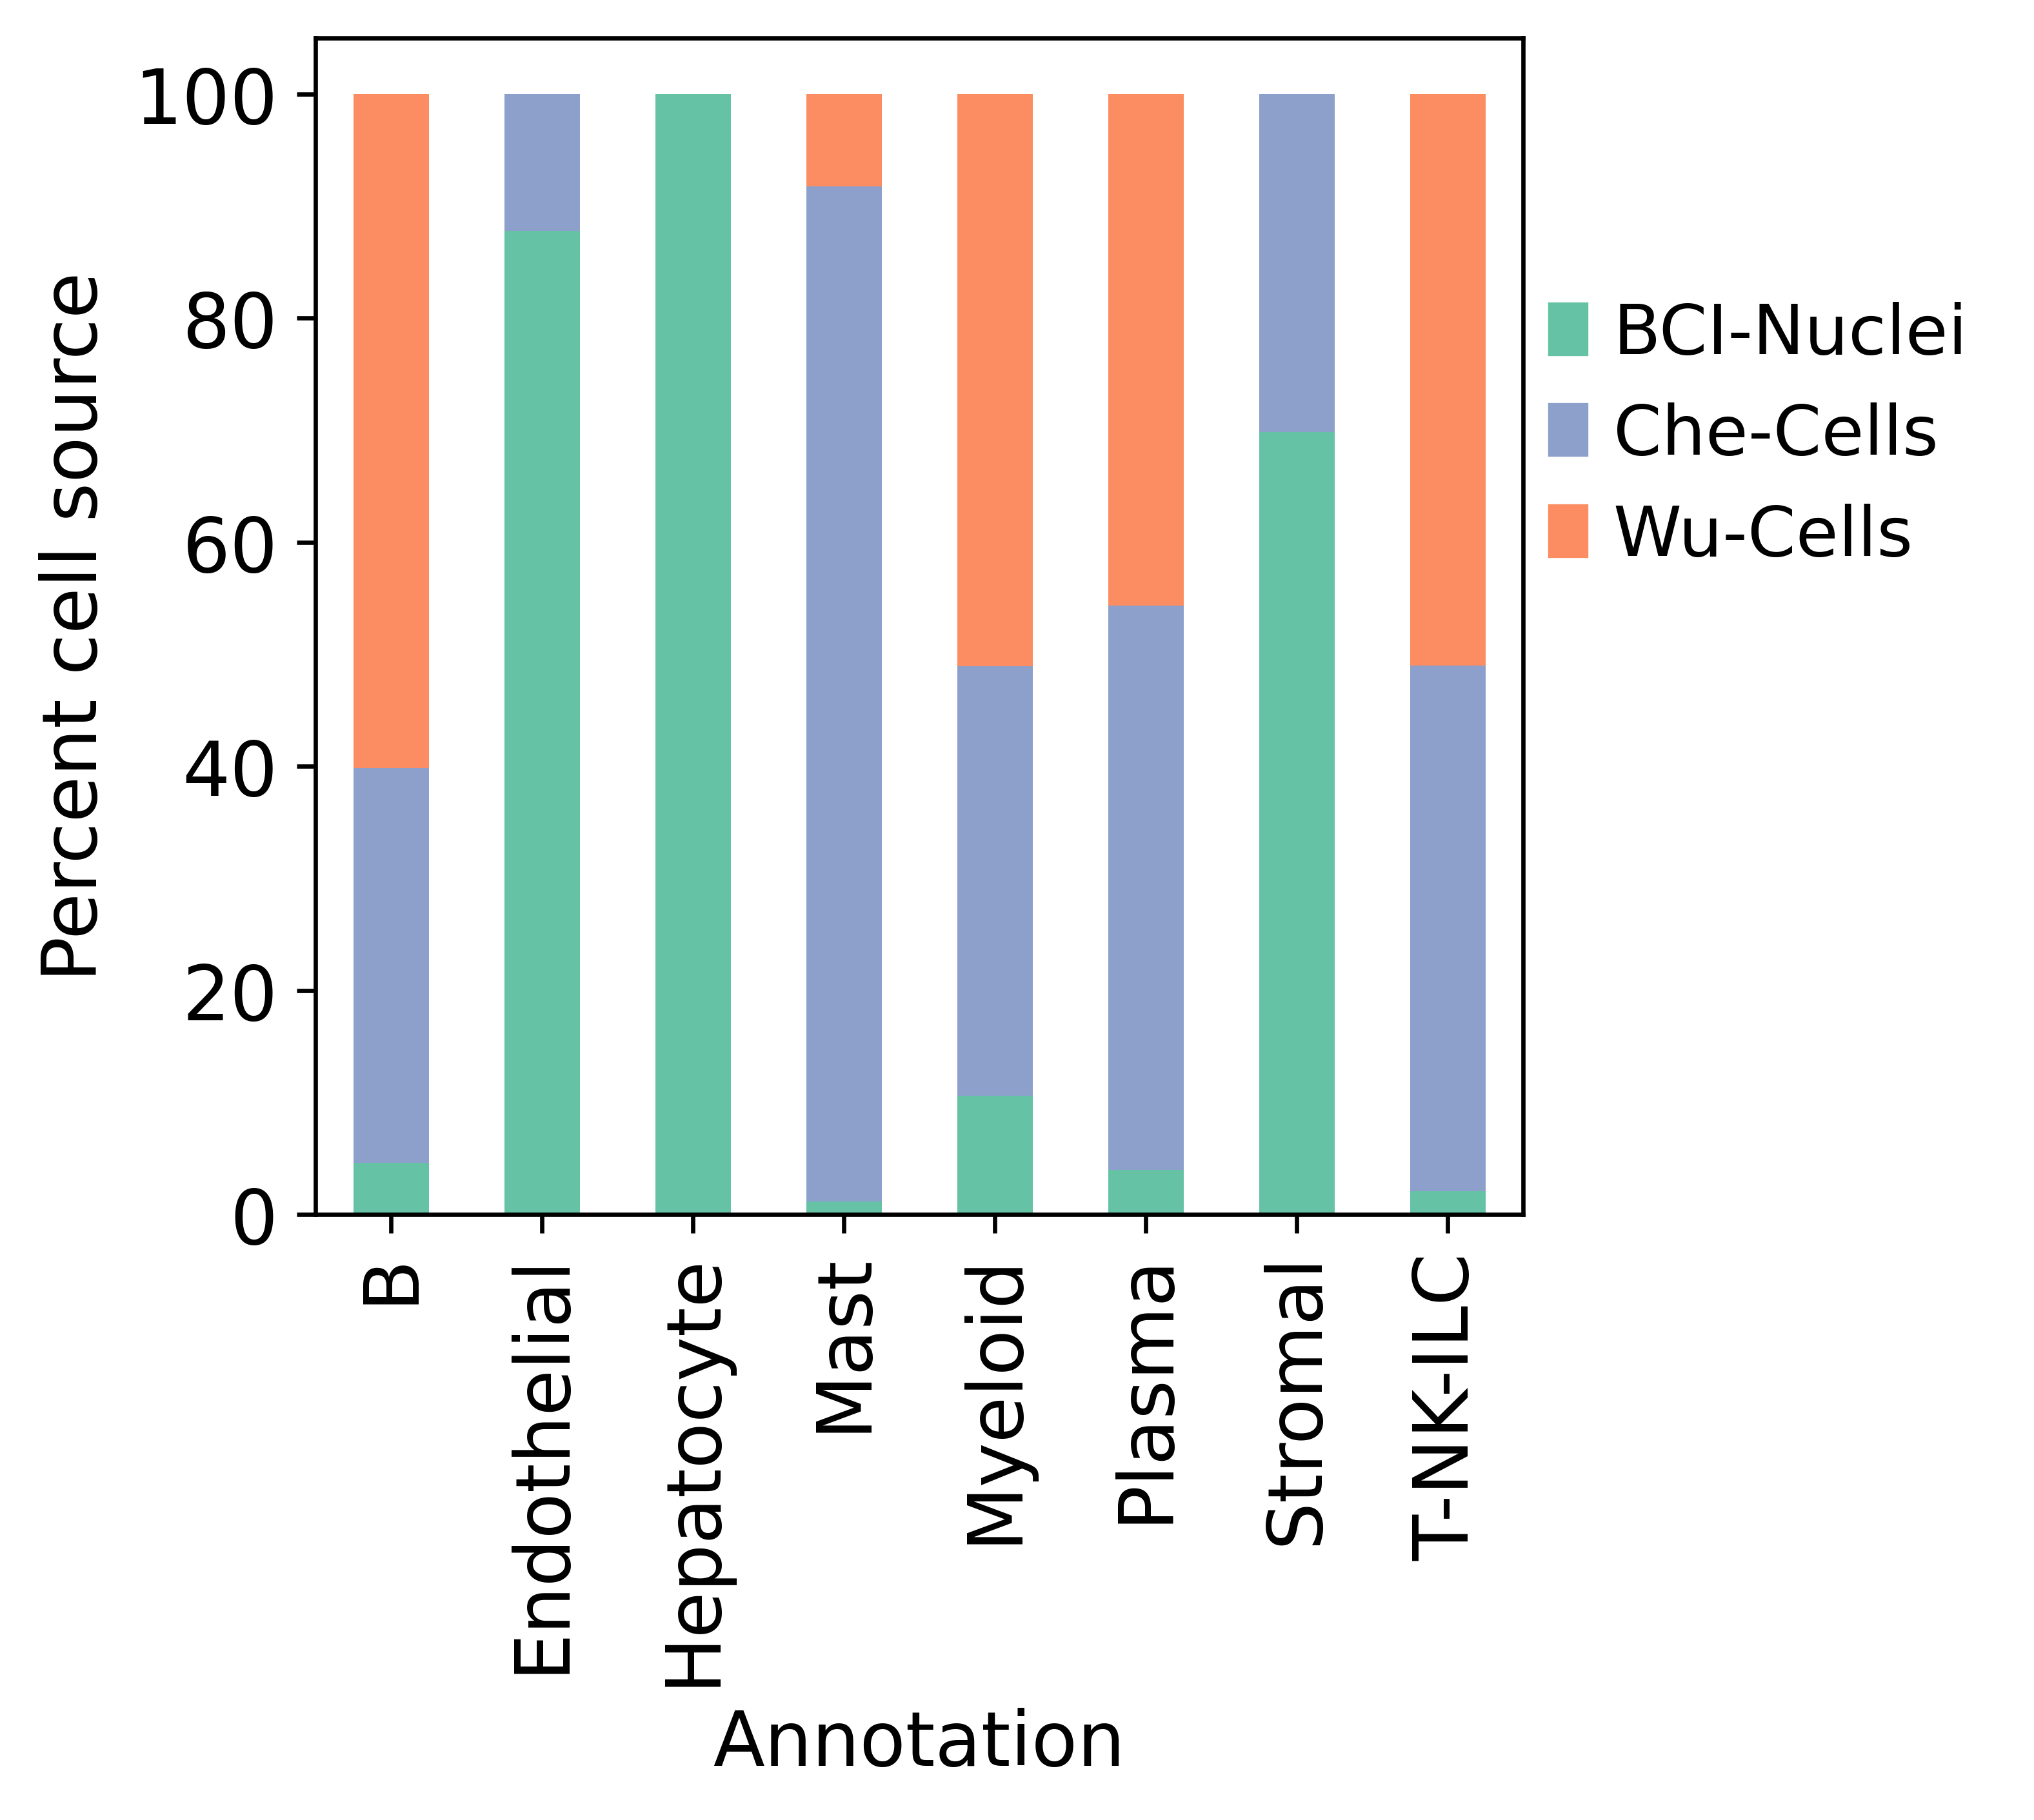

In [42]:
from collections import OrderedDict

color_dict = OrderedDict(
    zip(
        adata.obs["cell_source"].cat.categories.values.tolist(),
        adata.uns["cell_source_colors"],
    )
)

proportion_cells_patient(
    adata.obs,
    groupby_labels=["Annotation_scVI", "cell_source"],
    xlabel="Annotation",
    ylabel="Percent cell source",
    colors=color_dict,
    figname="annotation_cell_source.pdf",
)

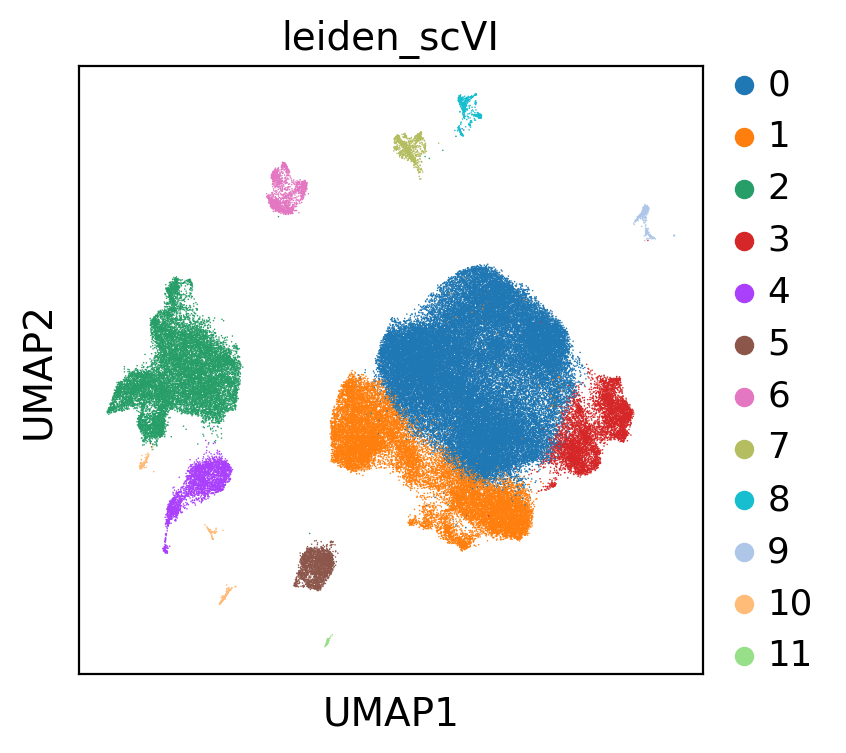

In [43]:
sc.pl.umap(adata, color="leiden_scVI", save="leiden_global.pdf")

### save objects

In [44]:
adata.write(
    DIR2SAVE.joinpath(
        "Multiome_Che_Wu_CRC_LM_integrated_scvi_hvg_final_annotations.h5ad"
    )
)

In [4]:
adata = sc.read_h5ad( DIR2SAVE.joinpath(
        "Multiome_Che_Wu_CRC_LM_integrated_scvi_hvg_final_annotations.h5ad"
    ))

In [46]:
adata.shape

(98312, 2000)

In [47]:
adata[adata.obs.Annotation_scVI == "T-NK-ILC"].shape

(75489, 2000)

In [48]:
adata[adata.obs.Annotation_scVI == "Myeloid"].shape

(17232, 2000)

In [49]:
adata[adata.obs.Annotation_scVI == "Stromal"].shape

(786, 2000)

In [50]:
adata[adata.obs.Annotation_scVI == "Endothelial"].shape

(557, 2000)

In [51]:
adata[adata.obs.Annotation_scVI == "Hepatocyte"].shape

(437, 2000)

In [52]:
adata[adata.obs.cell_source == "BCI-Nuclei"].shape

(5026, 2000)

In [53]:
adata.shape

(98312, 2000)

### for adata_raw only keep cells that are in adata 

In [54]:
adata_raw.shape

(107428, 37102)

In [55]:
# for the raw data keep only the cells that have been annotated
adata_raw = adata_raw[adata_raw.obs.index.isin(adata.obs.index)].copy()

In [56]:
adata_raw

AnnData object with n_obs × n_vars = 98312 × 37102
    obs: 'Patient', 'Sample', 'Cell_type', 'Cell_subtype', 'Tissue', 'Therapy', 'doublet_score', 'n_genes_by_counts', 'total_counts', 'pct_counts_mt', 'pct_counts_ribo', 'cell_source'
    var: 'n_cells'
    uns: 'Therapy_colors', 'Tissue_colors', 'cell_source_colors'

In [57]:
adata_raw.obs = adata_raw.obs.merge(
    right=adata.obs[["Annotation_scVI", "Annotation_scVI_detailed"]],
    how="left",
    left_index=True,
    right_index=True,
)

In [58]:
adata_raw.obs

Patient       Sample    Cell_type  \
CRC01_LM#AAACATGCATCAGCAC-1-BCI-Nuclei        CRC01     CRC01_LM      Myeloid   
CRC01_LM#AACATAGCAGGATAAC-1-BCI-Nuclei        CRC01     CRC01_LM      Myeloid   
CRC01_LM#AGAACAAGTGGTTATG-1-BCI-Nuclei        CRC01     CRC01_LM  Endothelial   
CRC01_LM#AGGTTGCGTGAGCAAG-1-BCI-Nuclei        CRC01     CRC01_LM  Endothelial   
CRC01_LM#CACCTCAGTGGTTATG-1-BCI-Nuclei        CRC01     CRC01_LM  Endothelial   
...                                             ...          ...          ...   
P8_Liver_T_GAGAAATAGGCCTGAA-Wu-Cells      Wu2021_P8   P8_Liver_T       Plasma   
P15_Liver_T_TTATTGCTCGCTAATG-1-Wu-Cells  Wu2021_P15  P15_Liver_T       Plasma   
P17_Liver_T_AAATGGACATGGAAGC-1-Wu-Cells  Wu2021_P17  P17_Liver_T       Plasma   
P18_Liver_T_TAACCAGCACTGCGAC-1-Wu-Cells  Wu2021_P18  P18_Liver_T       Plasma   
P19_Liver_T_ATTTACCAGCGACTGA-1-Wu-Cells  Wu2021_P19  P19_Liver_T       Plasma   

                                                 Cell_subtype Tissue Therapy  \
CRC01_LM#AAACATGCATCAGCAC-1-BCI-Nuclei          No annotation     LM     NAC   
CRC01_LM#AACATAGCAGGATAAC-1-BCI-Nuclei          No annotation     LM     NAC   
CRC01_LM#AGAACAAGTGGTTATG-1-BCI-Nuclei          No annotation     LM     NAC   
CRC01_LM#AGGTTGCGTGAGCAAG-1-BCI-Nuclei          No annotation     LM     NAC   
CRC01_LM#CACCTCAGTGGTTATG-1-BCI-Nuclei          No annotation     LM     NAC   
...                                                       ...    ...     ...   
P8_Liver_T_GAGAAATAGGCCTGAA-Wu-Cells     IGHG+ Plasma B cells     LM   naive   
P15_Liver_T_TTATTGCTCGCTAATG-1-Wu-Cells  IGHA+ Plasma B cells     LM     NAC   
P17_Liver_T_AAATGGACATGGAAGC-1-Wu-Cells  IGHG+ Plasma B cells     LM   naive   
P18_Liver_T_TAACCAGCACTGCGAC-1-Wu-Cells  IGHA+ Plasma B cells     LM     NAC   
P19_Liver_T_ATTTACCAGCGACTGA-1-Wu-Cells  IGHA+ Plasma B cells     LM     NAC   

                                         doublet_score  n_genes_by_counts  \
CRC01_LM#AAACATGCATCAGCAC-1-BCI-Nuclei        0.001115                727   
CRC01_LM#AACATAGCAGGATAAC-1-BCI-Nuclei        0.002359                365   
CRC01_LM#AGAACAAGTGGTTATG-1-BCI-Nuclei        0.000901                983   
CRC01_LM#AGGTTGCGTGAGCAAG-1-BCI-Nuclei        0.000203               5086   
CRC01_LM#CACCTCAGTGGTTATG-1-BCI-Nuclei        0.000393               1668   
...                                                ...                ...   
P8_Liver_T_GAGAAATAGGCCTGAA-Wu-Cells          0.133690               2624   
P15_Liver_T_TTATTGCTCGCTAATG-1-Wu-Cells       0.132075                903   
P17_Liver_T_AAATGGACATGGAAGC-1-Wu-Cells       0.148265               1680   
P18_Liver_T_TAACCAGCACTGCGAC-1-Wu-Cells       0.203540                776   
P19_Liver_T_ATTTACCAGCGACTGA-1-Wu-Cells       0.092437               1364   

                                         total_counts  pct_counts_mt  \
CRC01_LM#AAACATGCATCAGCAC-1-BCI-Nuclei          981.0       3.771662   
CRC01_LM#AACATAGCAGGATAAC-1-BCI-Nuclei          461.0       1.301518   
CRC01_LM#AGAACAAGTGGTTATG-1-BCI-Nuclei         1220.0       2.377049   
CRC01_LM#AGGTTGCGTGAGCAAG-1-BCI-Nuclei        10885.0       2.351860   
CRC01_LM#CACCTCAGTGGTTATG-1-BCI-Nuclei         2608.0       4.294479   
...                                               ...            ...   
P8_Liver_T_GAGAAATAGGCCTGAA-Wu-Cells          17023.0       2.202902   
P15_Liver_T_TTATTGCTCGCTAATG-1-Wu-Cells        3453.0       2.114104   
P17_Liver_T_AAATGGACATGGAAGC-1-Wu-Cells        7002.0       3.313339   
P18_Liver_T_TAACCAGCACTGCGAC-1-Wu-Cells        2594.0       9.483423   
P19_Liver_T_ATTTACCAGCGACTGA-1-Wu-Cells        4740.0       3.206751   

                                         pct_counts_ribo cell_source  \
CRC01_LM#AAACATGCATCAGCAC-1-BCI-Nuclei          1.630989  BCI-Nuclei   
CRC01_LM#AACATAGCAGGATAAC-1-BCI-Nuclei          4.555315  BCI-Nuclei   
CRC01_LM#AGAACAAGTGGTTATG-1-BCI-Nuclei          1.557377  BCI-Nuclei   
CRC01_LM#AGGTTGCGTGAGCAAG-1-BCI-

In [59]:
adata_raw.X[0:5, 0:5].todense()

matrix([[0.        , 0.        , 0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.99976325, 2.        , 0.        ],
        [0.        , 0.        , 0.        , 1.        , 0.        ]],
       dtype=float32)

In [60]:
np.max(adata_raw.X)

40676.0

In [61]:
adata_raw.write(
    DIR2SAVE.joinpath(
        "Multiome_Che_Wu_CRC_LM_integrated_scvi_hvg_final_annotations_raw.h5ad"
    )
)

In [62]:
adata_raw[adata_raw.obs.cell_source == "BCI-Nuclei"].shape

(5026, 37102)